In [44]:
import pandas as pd

truefriends = pd.read_excel('C:\\Users\\sjjung\\Desktop\\contestData\\truefriends.xlsx',thousands = ',')

In [45]:
truefriends.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 845940 entries, 0 to 845939
Data columns (total 24 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   고객구분코드     845940 non-null  object
 1   주문일자       845940 non-null  int64 
 2   고객성별구분코드   845940 non-null  int64 
 3   동일나이군구분코드  845940 non-null  int64 
 4   주소(시도)     845940 non-null  object
 5   주문시간대      845940 non-null  int64 
 6   상품번호       845940 non-null  object
 7   상품명        845940 non-null  object
 8   거래소구분코드    845940 non-null  int64 
 9   매도매수구분코드   845940 non-null  int64 
 10  주문구분코드     845940 non-null  int64 
 11  실주문단가      845940 non-null  int64 
 12  주문수량       845940 non-null  int64 
 13  총체결수량      845940 non-null  int64 
 14  총체결금액      845940 non-null  int64 
 15  전일종가       845940 non-null  int64 
 16  당일시가       845940 non-null  int64 
 17  일중고가       845940 non-null  int64 
 18  일중저가       845940 non-null  int64 
 19  당일종가       845940 non-null  int64 
 20  거래수량

In [46]:
truefriends.isnull().sum()

고객구분코드       0
주문일자         0
고객성별구분코드     0
동일나이군구분코드    0
주소(시도)       0
주문시간대        0
상품번호         0
상품명          0
거래소구분코드      0
매도매수구분코드     0
주문구분코드       0
실주문단가        0
주문수량         0
총체결수량        0
총체결금액        0
전일종가         0
당일시가         0
일중고가         0
일중저가         0
당일종가         0
거래수량         0
거래대금         0
상한가여부        0
하한가여부        0
dtype: int64

In [47]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import warnings
%matplotlib inline

import matplotlib.font_manager as fm
font_name = fm.FontProperties(fname = 'C:/Windows/Fonts/malgun.ttf').get_name()
mpl.rc('font', family = font_name)

plt.style.use('seaborn') # seaborn 스타일로 변환
plt.rc('font',family='Malgun Gothic')
plt.rc('axes',unicode_minus=False)
pd.set_option('display.max_columns',None)
warnings.filterwarnings(action='ignore') # Warning Message 안 보이게
import pandas.util.testing as tm

import matplotlib as mpl # 고해상도 Plot 을 위해 DPI 조절
mpl.rcParams['figure.dpi']=150

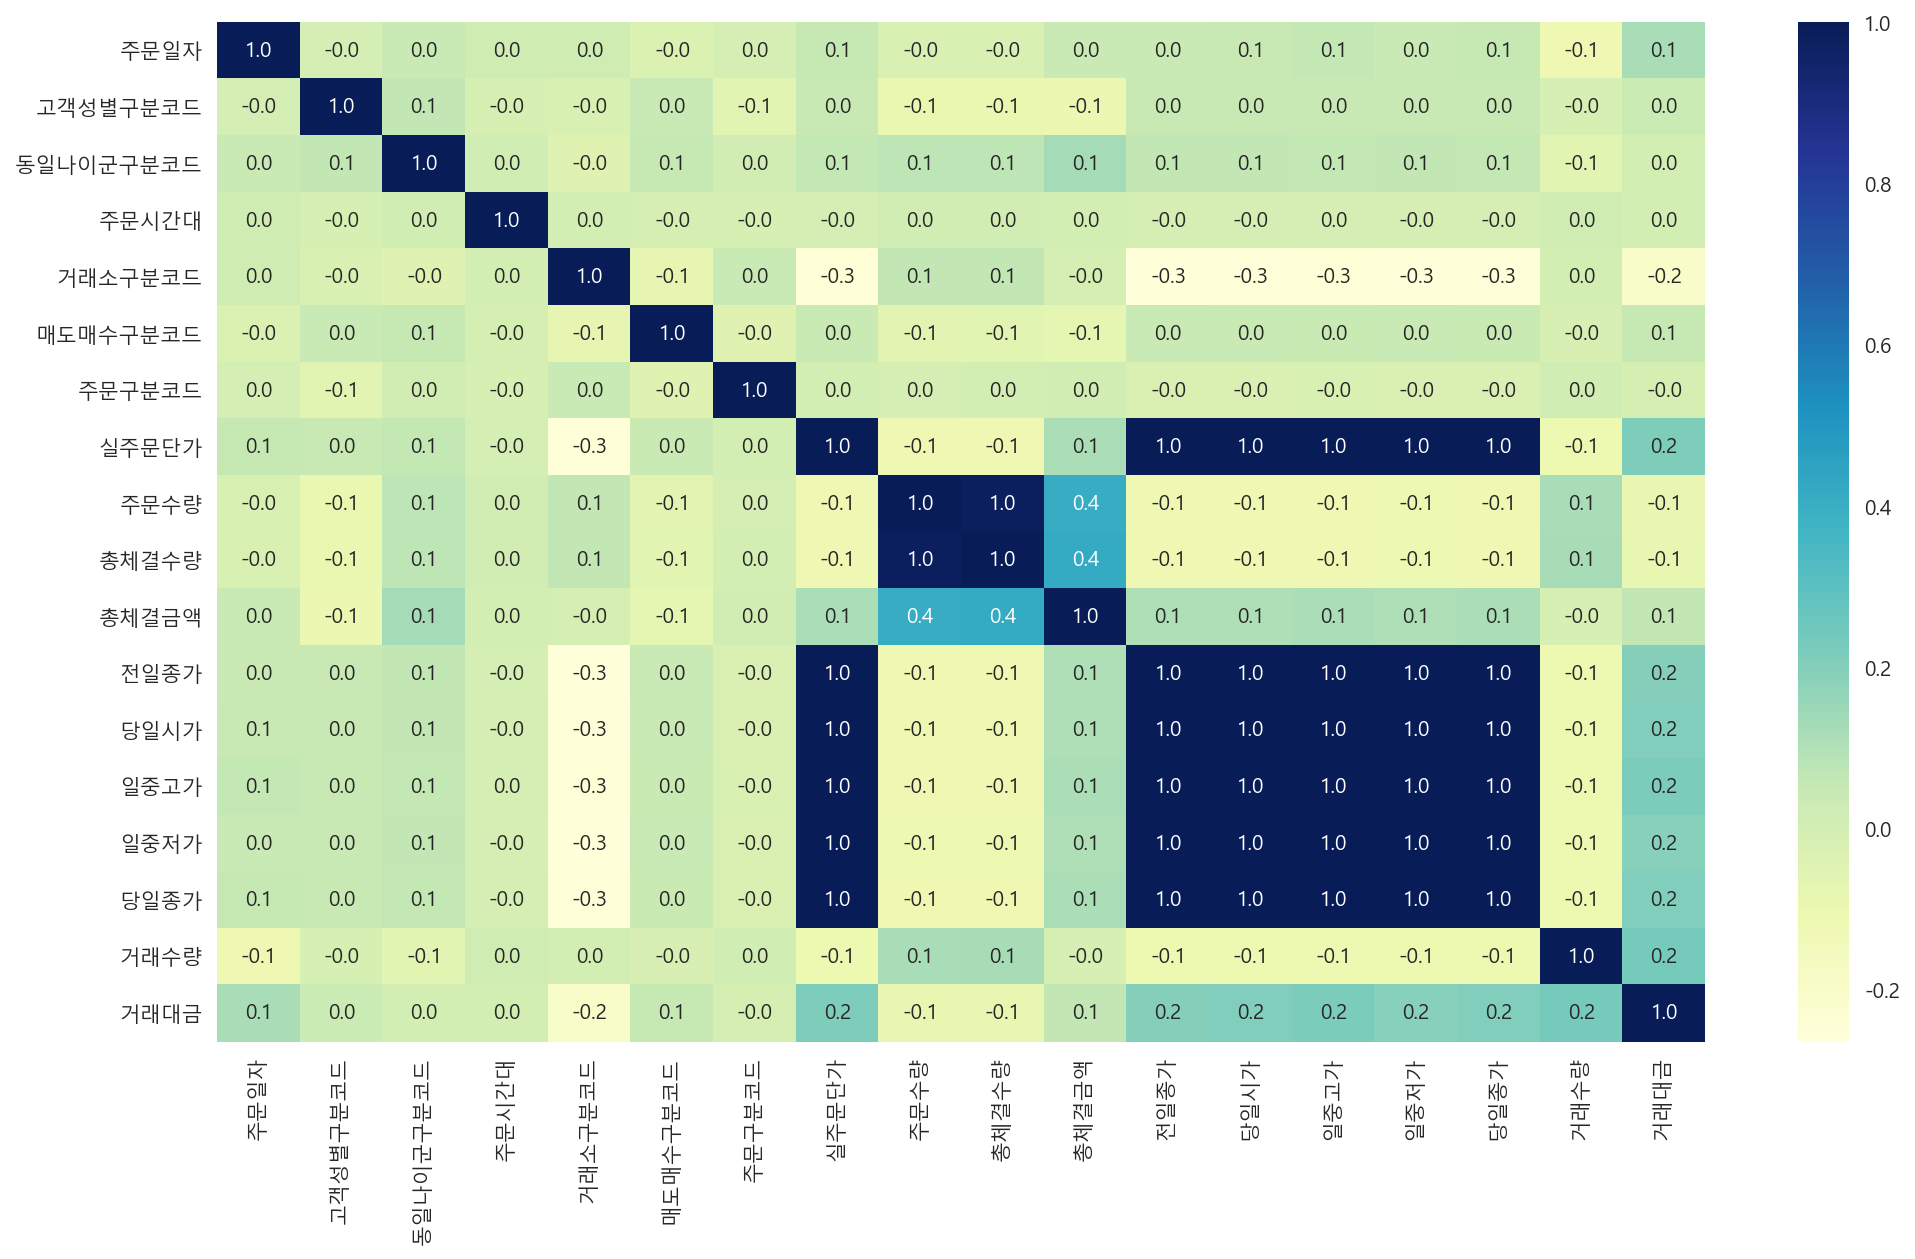

In [48]:
plt.figure(figsize=(16,9))
sns.heatmap(truefriends.corr(),cmap='YlGnBu',annot=True,fmt="0.1f") 
plt.show()

In [49]:
truefriends['매도'] = truefriends['매도매수구분코드'].apply(lambda x: 1 if x==1 else 0)
truefriends['매수'] = truefriends['매도매수구분코드'].apply(lambda x: 1 if x==2 else 0)
truefriends['체결평균단가'] = truefriends['총체결금액']/truefriends['총체결수량'].astype(int)
truefriends['mz세대']  = truefriends['동일나이군구분코드'].apply(lambda x: 1 if x==20 else(1 if x==30 else 0))

tf = truefriends.drop(['주소(시도)','주문시간대','거래소구분코드','주문구분코드','상한가여부','하한가여부','매도매수구분코드','실주문단가','주문수량'],axis=1)

In [50]:
tf

,고객구분코드,주문일자,고객성별구분코드,동일나이군구분코드,상품번호,상품명,총체결수량,총체결금액,전일종가,당일시가,일중고가,일중저가,당일종가,거래수량,거래대금,매도,매수,체결평균단가,mz세대
0,A0001,20200128,1,30,00000A091970,나노캠텍,20,75900,3215,3710,4125,3660,4095,17266597,67323312855,0,1,"3,795",1
1,A0001,20200130,1,30,00000A045060,오공,20,154200,7690,8150,8380,7360,7920,15686931,125404000000,0,1,"7,710",1
2,A0001,20200313,1,30,00000A253840,수젠텍,10,118000,13600,12200,12250,10150,10750,3731106,40782765600,0,1,"11,800",1
3,A00010,20200220,1,20,00000A009190,대양금속보통주,14,49070,3615,3615,3675,3475,3505,635410,2250893355,0,1,"3,505",1
4,A000100,20200211,2,40,00000A001740,SK네트웍스보통주,3,14625,4780,4800,4885,4800,4850,1263089,6112026870,1,0,"4,875",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
845935,A0009999,20200331,1,20,00000A043200,파루,150,303000,1995,2035,2135,1990,2030,2764564,5682482755,0,1,"2,020",1
845936,A0009999,20200325,1,20,00000A068760,셀트리온제약,8,507200,57300,61700,70600,58700,60300,8892944,560929000000,1,0,"63,400",1
845937,A0009999,20200330,1,20,00000A038290,마크로젠,25,970000,38900,40050,40800,37500,40400,1912985,75631708300,0,1,"38,800",1
845938,A0009999,20200323,1,20,00000A000660,에스케이하이닉스보통주,8,553600,74800,69700,71600,68000,69400,8037426,560505000000,1,0,"69,200",1


In [81]:
pd.options.display.float_format = '{:,.0f}'.format
# MZ 세대가 주로 투자하는 종목

tf_mz = tf[tf['mz세대']==1]
tf_mz['동일나이군구분코드'].unique()


tf_invest = tf_mz.groupby('상품명')['총체결금액'].sum().reset_index().sort_values(by='총체결금액',ascending=False)
tf_invest['총체결금액'] = tf_invest['총체결금액'].astype(float)
tf_invest = tf_invest.head(20)
tf_invest

,상품명,총체결금액
863,씨젠,"32,274,264,650"
636,삼성전자보통주,"31,473,813,350"
1302,이원다이애그노믹스,"13,909,470,810"
1857,한진칼보통주,"10,840,661,700"
437,랩지노믹스,"9,750,968,530"
821,신풍제약보통주,"8,840,963,550"
635,삼성전자1우선주,"8,215,045,550"
777,수젠텍,"7,830,184,590"
1206,웰크론,"6,570,257,190"
545,미코,"6,375,337,830"


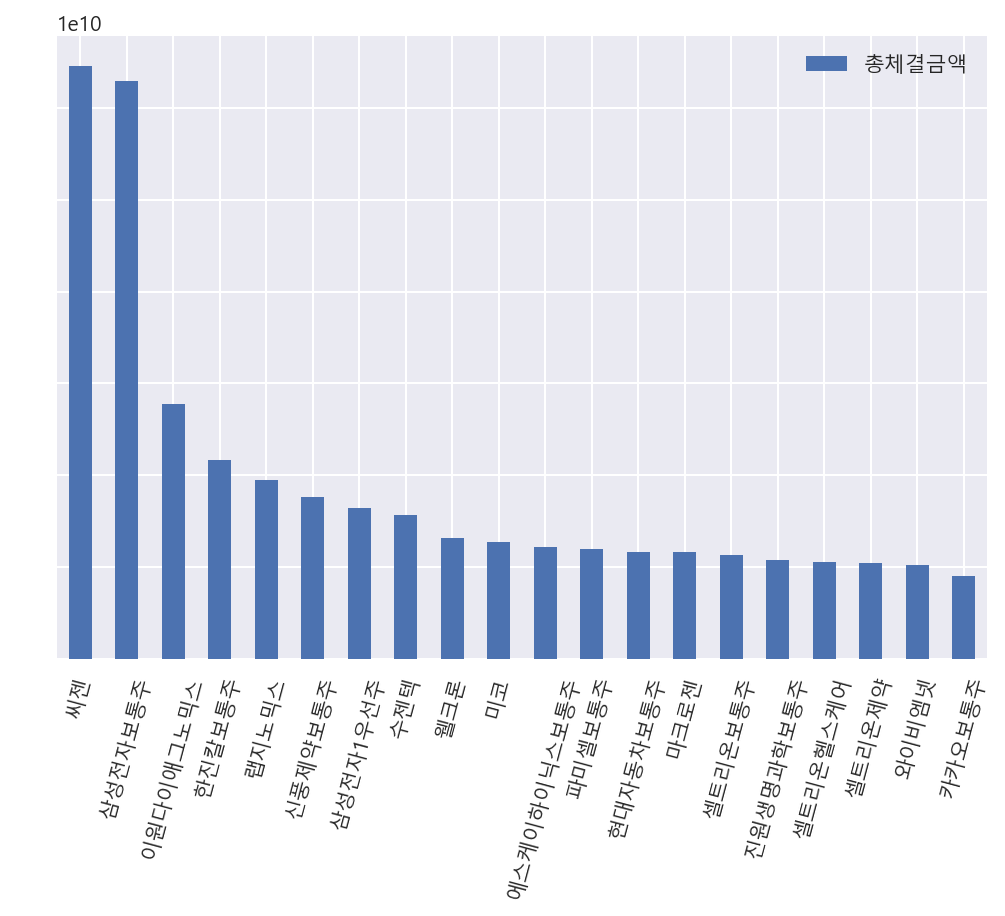

In [94]:
f, ax2 = plt.subplots(1,1, sharex='all')
tf_invest.pivot_table('총체결금액','상품명').sort_values(by='총체결금액',ascending=False).plot.bar(ax=ax2)
plt.xticks(rotation=75)
plt.yticks(color='w')
plt.xlabel('')
plt.grid(True)
plt.show()

In [96]:
pd.options.display.float_format = '{:,.0f}'.format
# MZ 세대가 아닌세대가 주로 투자하는 종목

tf_ad = tf[tf['mz세대']==0]
tf_ad['동일나이군구분코드'].unique()


tf_invest2 = tf_ad.groupby('상품명')['총체결금액'].sum().reset_index().sort_values(by='총체결금액',ascending=False)
tf_invest2['총체결금액'] = tf_invest2['총체결금액'].astype(float)
tf_invest2 = tf_invest2.head(20)
tf_invest2

,상품명,총체결금액
628,삼성전자보통주,"40,855,654,300"
854,씨젠,"26,507,604,800"
627,삼성전자1우선주,"10,784,077,100"
1830,한진칼보통주,"8,076,790,450"
987,에스케이하이닉스보통주,"8,015,761,300"
814,신풍제약보통주,"7,909,511,730"
1287,이원다이애그노믹스,"7,361,038,240"
770,수젠텍,"7,129,081,500"
432,랩지노믹스,"7,124,542,720"
751,셀트리온보통주,"6,923,086,500"


In [133]:
len(tf['상품번호'].unique()) # 1971개 종목

temp = tf2['상품번호'].unique()
#for i in range(len(temp)):
temp2 = pd.DataFrame(temp)   
temp3 = [i for i in range(1,1972)]
temp4 = pd.DataFrame(temp3)
stock = pd.concat([temp2,temp4],axis=1)
stock.columns=['상품번호','종목번호']
stock

,상품번호,종목번호
0,00000A091970,1
1,00000A045060,2
2,00000A253840,3
3,00000A009190,4
4,00000A001740,5
...,...,...
1966,00000A001130,1967
1967,00000A025880,1968
1968,00000A005725,1969
1969,00000A008420,1970


In [138]:
tf2 = pd.merge(tf,stock,how='outer',on='상품번호')
tf3 = tf2.drop(['고객구분코드','동일나이군구분코드','상품명','상품번호'],axis=1)
tf3

,주문일자,고객성별구분코드,총체결수량,총체결금액,전일종가,당일시가,일중고가,일중저가,당일종가,거래수량,거래대금,매도,매수,체결평균단가,mz세대,종목번호
0,20200128,1,20,75900,3215,3710,4125,3660,4095,17266597,67323312855,0,1,"3,795",1,1
1,20200326,1,1396,2275480,1485,1580,1695,1520,1615,2471054,4018881455,1,0,"1,630",0,1
2,20200128,1,440,1672000,3215,3710,4125,3660,4095,17266597,67323312855,0,1,"3,800",0,1
3,20200325,1,270,409050,1415,1495,1525,1450,1485,1093463,1622381985,1,0,"1,515",0,1
4,20200128,1,246,990150,3215,3710,4125,3660,4095,17266597,67323312855,0,1,"4,025",1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
845935,20200327,1,202,301990,1435,1525,1540,1415,1490,146050,217174175,1,0,"1,495",1,1970
845936,20200304,1,137,305485,2210,2210,2240,2190,2235,53406,118620480,0,1,"2,230",1,1970
845937,20200327,1,399,612465,1435,1525,1540,1415,1490,146050,217174175,0,1,"1,535",1,1970
845938,20200326,2,300,107400,343,348,380,348,360,214715,78294725,0,1,358,0,1971


0.6500830437146843
0.6486039198997565
[0.01554664 0.13074209 0.00577109 0.5301296  0.00688916 0.
 0.         0.01842666 0.01085624 0.17154046 0.05517122 0.04120974
 0.         0.00971459 0.00400252]


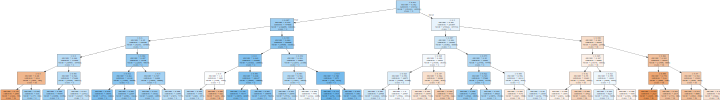

In [143]:
# 의사결정트리

# 1. 데이터 로드
tf3

#2. 훈련 데이터와 테스트 데이터를 분리 합니다. + 정규화 
x = tf3[['주문일자','고객성별구분코드','총체결수량','총체결금액','전일종가','당일시가','일중고가','일중저가','당일종가','거래수량',
        '거래대금','매도','매수','체결평균단가','종목번호']]
y = tf3['mz세대']

from  sklearn.preprocessing  import MinMaxScaler

x_scaled = MinMaxScaler().fit(x).transform(x)

from  sklearn.model_selection  import   train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=0)
#print(x_train.shape)  # (831654, 17)
#print(x_test.shape)  # (207914, 17)
#print(y_train.shape)  # 831654,)
#print(y_test.shape) # (207914,)

#4.   모델 생성
from  sklearn.tree  import  DecisionTreeClassifier

model = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=0)

#5.   모델 훈련
model.fit(x_train, y_train)

#6.   모델 예측
result = model.predict(x_test)

#7.   모델 평가
print(model.score(x_train,y_train)) # 훈련데이터 스코어 0.7458997470107833
print(model.score(x_test,y_test))  # 테스트 데이터 스코어 0.7462382192594517
print(model.feature_importances_)

# 8. graphviz 로 의사결정트리 그리기
import graphviz
from sklearn.tree import export_graphviz

export_graphviz(model, out_file="tree.dot", class_names='mz세대',
                feature_names = x.columns, impurity=True, filled=True,special_characters = True)

with open("tree.dot",encoding='utf-8') as f:
  dot_graph = f.read()
graphviz.Source(dot_graph)

import pydotplus
pydot_graph = pydotplus.graph_from_dot_data(dot_graph)
pydot_graph.set_size('"10,9!"')
pydot_graph.write_png('resized_tree.png')
gvz_graph = graphviz.Source(pydot_graph.to_string())
gvz_graph

In [147]:
tf_mz['고객성별구분코드'].value_counts()

1    327070
2    204646
Name: 고객성별구분코드, dtype: int64

In [149]:
tf_ad['고객성별구분코드'].value_counts()

1    182141
2    132083
Name: 고객성별구분코드, dtype: int64

([<matplotlib.axis.XTick at 0x1a1698c86a0>,
 [Text(0, 0, 'MZ세대'), Text(1, 0, 'MZ아닌세대')])

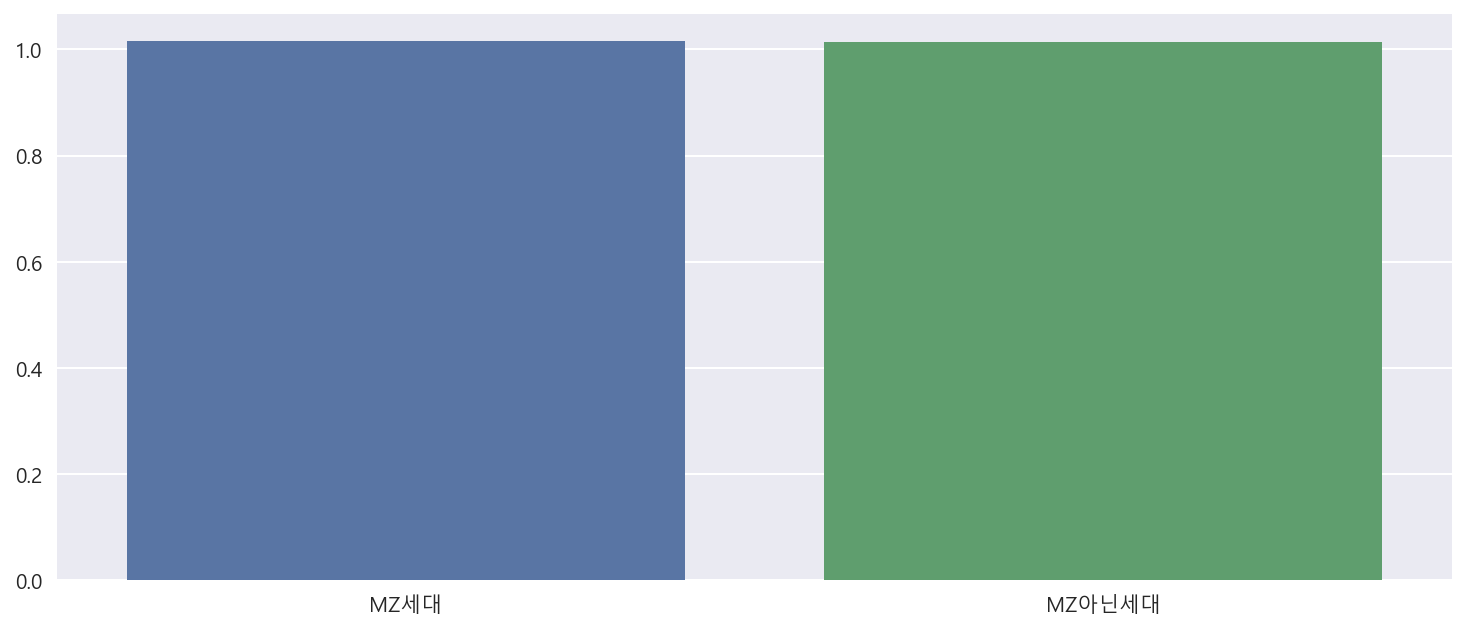

In [169]:
# 매수에서
# 체결평균단가 / 당일종가 

# mz 세대
test_mz1 = tf_mz[tf_mz['매수']==1]
test_mz1['당일종가'] = test_mz1['당일종가'].astype(float)
mask = test_mz1['체결평균단가']/test_mz1['당일종가']
mask.mean() # 1.0146114874100027

# mz 아닌 세대
test_ad1 = tf_ad[tf_ad['매수']==1]
test_ad1['당일종가'] = test_ad1['당일종가'].astype(float)
mask2 = test_ad1['체결평균단가']/test_ad1['당일종가']
mask2.mean() # 1.0146114874100027



age_dict = {'mz세대':[mask.mean()],'다른세대':[mask2.mean()]}
mask_age = pd.DataFrame(age_dict)


plt.figure(figsize=(12, 5))
sns.barplot(data=mask_sex)
plt.xticks([0,1], ['MZ세대', 'MZ아닌세대'])

1.015340507768609 1.0135199554178913
   mz남성  mz여성
0     1     1


([<matplotlib.axis.XTick at 0x1a19cf7ce50>,
 [Text(0, 0, 'MZ남성'), Text(1, 0, 'MZ여성')])

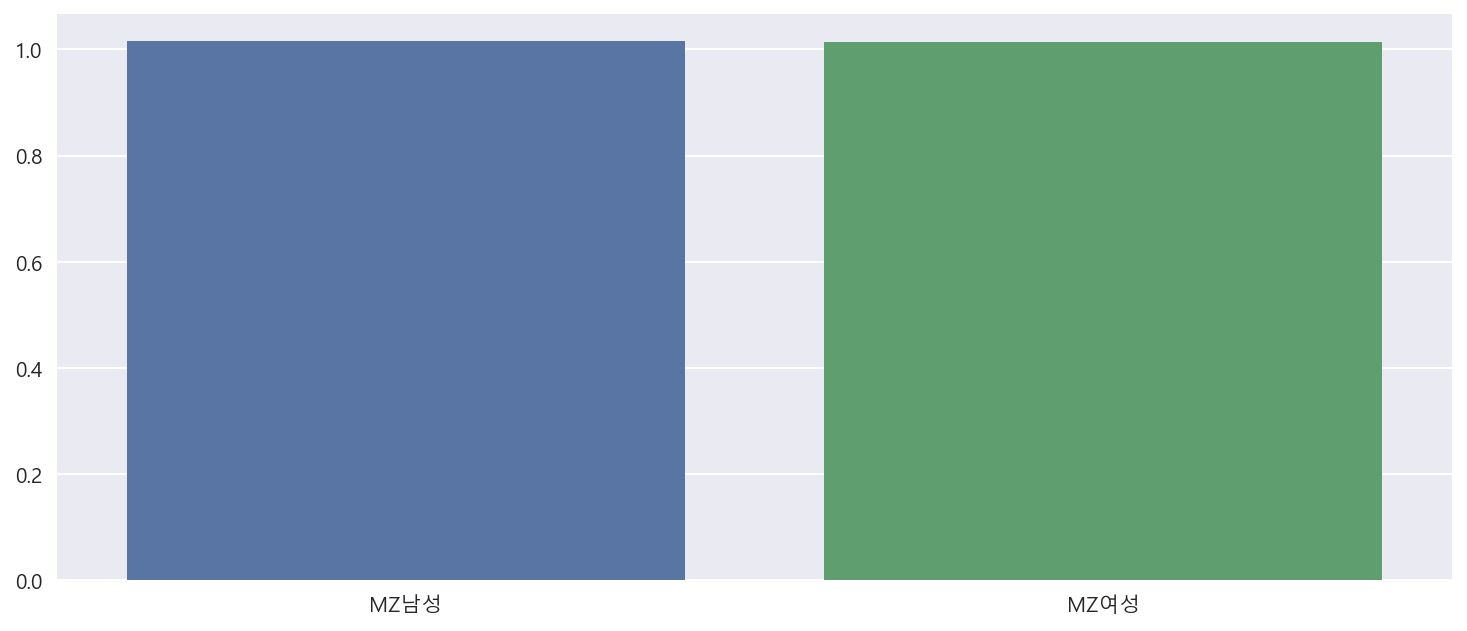

In [172]:
# 남녀 구분했을 때
test_mz_male = tf_mz[(tf_mz['매수']==1) & (tf_mz['고객성별구분코드']==1)]
test_mz_female = tf_mz[(tf_mz['매수']==1) & (tf_mz['고객성별구분코드']==2)]
mask_male = test_mz_male['체결평균단가']/test_mz_male['당일종가']
mask_female = test_mz_female['체결평균단가']/test_mz_female['당일종가']
print(mask_male.mean(),mask_female.mean())
sex_dict = {'mz남성':[mask_male.mean()],'mz여성':[mask_female.mean()]}
mask_sex = pd.DataFrame(sex_dict)
print(mask_sex)

plt.figure(figsize=(12, 5))
sns.barplot(data=mask_sex)
plt.xticks([0,1], ['MZ남성', 'MZ여성'])